In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving _0415_features_without_nans_survival.csv to _0415_features_without_nans_survival.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['_0415_features_without_nans_survival.csv']))

In [ ]:
data.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
data

,Age,Gender,onset_delta,diag_delta,diag_minus_onset,mean_alsfrs_total,alsfrs_total_slope,fvc_slope,fvc_mean,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status,onset_site_1,onset_site_2,onset_site_3
0,52.0,0,-501.0,-302.0,199.0,30.250000,-0.009689,-0.931358,103.293488,4.00,4.000000,4.00,3.50,2.00,2.250000,3.50,2.000000,1.000000,4.00,8.00,14.250000,0.000000,0.000000,0.000000,0.016393,0.000000,-0.016393,0.016393,0.000000,0.000000,0.000000,0.000000,-0.016393,401,0,0,0,0
1,65.0,0,-1023.0,-44.0,979.0,28.666667,0.002114,-0.583333,73.500000,1.00,1.333333,2.00,4.00,4.00,3.333333,4.00,3.333333,2.666667,3.00,3.00,21.333333,-0.010989,-0.010989,0.000000,0.000000,0.000000,-0.010989,0.010989,0.010989,0.010989,0.000000,-0.010989,0.010989,378,0,1,0,0
2,66.0,0,-550.0,-462.0,88.0,32.000000,-0.043752,0.076462,52.652720,0.75,2.750000,0.75,4.00,4.00,4.000000,4.00,4.000000,4.000000,3.75,1.50,24.000000,0.000000,-0.014493,-0.014493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014493,-0.014493,0.000000,434,0,1,0,0
3,41.0,1,-570.0,-511.0,59.0,16.500000,-0.104167,0.000000,71.000000,2.50,3.000000,3.00,1.50,1.00,1.000000,0.50,0.500000,0.000000,3.50,5.50,4.500000,-0.020833,-0.041667,0.000000,-0.020833,0.000000,0.000000,-0.020833,-0.020833,0.000000,0.020833,-0.020833,-0.062500,542,0,0,1,0
4,63.0,1,-365.0,-209.0,156.0,30.000000,0.000000,-0.235294,114.000000,4.00,4.000000,4.00,3.00,3.00,2.000000,3.00,3.000000,1.000000,3.00,8.00,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,401,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,43.0,1,-673.0,-293.0,380.0,22.750000,-0.033444,0.678853,95.564652,3.00,3.750000,3.00,2.00,1.25,1.000000,2.00,2.000000,0.750000,4.00,6.00,9.000000,0.000000,-0.012821,0.000000,0.000000,-0.012821,0.000000,0.012821,0.000000,-0.012821,0.000000,0.000000,-0.025641,384,0,0,1,0
1646,70.0,1,-332.0,-181.0,151.0,29.500000,-0.090079,-0.270229,65.989389,1.25,1.500000,2.50,4.00,2.75,3.500000,4.00,3.750000,3.000000,3.25,3.75,21.000000,-0.014085,-0.028169,-0.014085,0.000000,-0.014085,-0.014085,0.014085,-0.014085,0.000000,0.014085,-0.028169,-0.042254,436,0,1,0,0
1647,46.0,0,-274.0,-212.0,62.0,20.500000,-0.055424,-0.608825,89.564790,1.50,3.250000,3.00,2.25,1.00,0.500000,2.25,2.000000,0.750000,4.00,4.50,8.750000,0.000000,0.011765,-0.011765,-0.035294,0.000000,0.000000,0.011765,0.000000,-0.011765,0.000000,-0.011765,-0.058824,410,0,1,0,0
1648,62.0,1,-288.0,-110.0,178.0,36.000000,0.000000,0.086856,138.802286,4.00,4.000000,4.00,4.00,4.00,3.000000,3.50,3.000000,2.500000,4.00,8.00,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,0.000000,0.000000,444,0,0,1,0


In [ ]:
y = data[['status']]

In [ ]:
feat_list = ['Age', 'Gender', 'onset_site_1','onset_site_2', 'onset_site_3', 'onset_delta',
       'diag_minus_onset', 'alsfrs_total_slope',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory', 'time_event', 'status'
       ]

Train/test 분할

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(data[feat_list], y, train_size=0.8, test_size=0.2, random_state=11)

Sample size 계산

In [ ]:
!pip install lifelines

     |████████████████████████████████| 348kB 6.4MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4035 sha256=cfcab00704e306f689462c7c72ff7cbac3ec29e32e742d3c708251077955acb9
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [ ]:
from lifelines.statistics import sample_size_necessary_under_cph

desired_power = 0.8
ratio_of_participants = 1.
p_exp = 0.25
p_con = 0.35
postulated_hazard_ratio = 0.7
n_exp, n_con = sample_size_necessary_under_cph(desired_power, ratio_of_participants, p_exp, p_con, postulated_hazard_ratio)

모델 적용하기

In [ ]:
from lifelines import CoxPHFitter

In [33]:
cph = CoxPHFitter(penalizer=0.01)
cph.fit(df_train, 'time_event', event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1320 total observations, 1130 right-censored observations>
             duration col = 'time_event'
                event col = 'status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1320
number of events observed = 190
   partial log-likelihood = -980.60
         time fit was run = 2021-04-29 11:32:54 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
Age                             0.05       1.05       0.01             0.03             0.06                 1.03                 1.06
Gender                          0.06       1.06       0.16            -0.25             0.37                 0.78                 1.45
onset_site_1                    0.34       1.40       0.33            -0.31             0.98                 0.74                 2.66
onset_site_2                    0.05       1.05       0.27            -0.48             0.58                 0.62                 1.78
onset_site_3                    0.76       2.15       0.66            -0.53             2.06                 0.59                 7.85
onset_delta                     0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diag_minus_onset                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
alsfrs_total_slope              0.01       1.01       2.71            -5.29             5.32                 0.01               204.23
fvc_slope                      -0.14       0.87       0.32            -0.77             0.50                 0.46                 1.65
fvc_mean                       -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
mean_Q10_Respiratory            0.02       1.02       0.12            -0.22             0.26                 0.81                 1.30
mean_Bulbar                    -0.02       0.98       0.06            -0.15             0.10                 0.86                 1.10
mean_motor                     -0.05       0.95       0.02            -0.09            -0.02                 0.92                 0.98
slope_Q1_Speech                -0.45       0.63       6.68           -13.54            12.63                 0.00             3.05e+05
slope_Q2_Salivation           -10.90       0.00       7.22           -25.06             3.26                 0.00                26.16
slope_Q3_Swallowing             7.50    1816.13       6.93            -6.07            21.08                 0.00             1.43e+09
slope_Q4_Handwriting           -1.35       0.26       5.92           -12.96            10.26                 0.00             28507.26
slope_Q5_Cutting               -0.02       0.98       7.06           -13.85            13.81                 0.00             9.95e+05
slope_Q6_Dressing_and_Hygiene  -6.19       0.00       6.99           -19.90             7.51                 0.00              1834.94
slope_Q7_Turning_in_Bed        -2.02       0.13       4.12           -10.10             6.06                 0.00               427.94
slope_Q8_Walking              -12.95       0.00       8.19           -29.00             3.10                 0.00                22.22
slope_Q9_Climbing_Stairs       -2.87       0.06       5.06           -12.78             7.04                 0.00              1139.00
slope_Q10_Respiratory          -9.97       0.00       5.62           -20.99             1.04                 0.00                 2.84

                                  z      p   -log2(p)
covariate                                            
Age                            6.44 <0.005      33.00
Gender                        

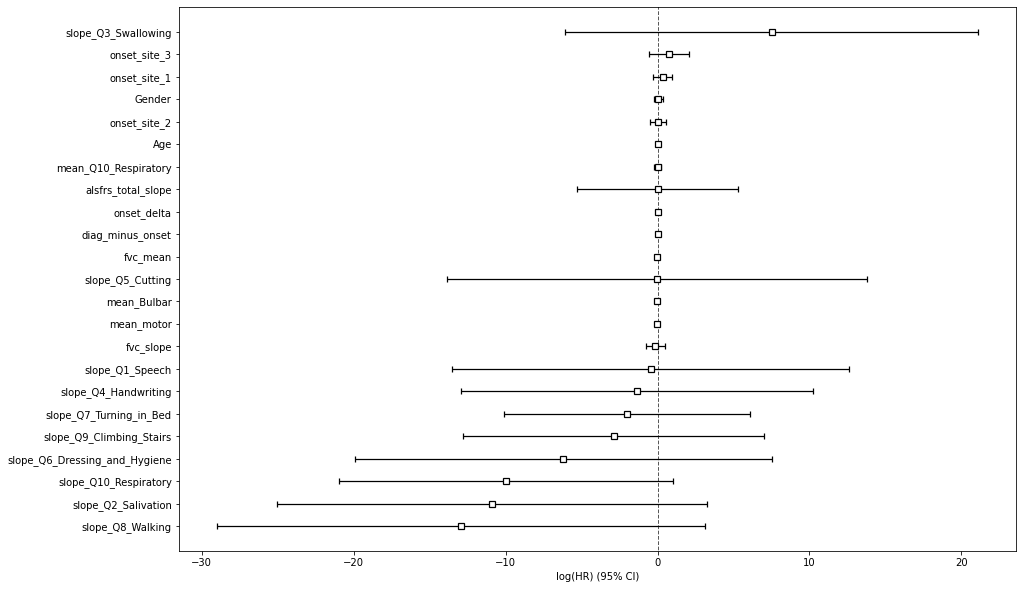

In [ ]:
plt.figure(figsize=(15,10))
cph.plot()
#HR >1, 즉 log(HR)>0 이면 사망 위험 증가를 뜻함

Test 데이터에 대해 예측하기

In [ ]:
df_test_X = df_test.drop(columns=['time_event', 'status'])

In [ ]:
# Selecting 3 random subjects to predict survival
test_1 = df_test_X.iloc[-5:, :]

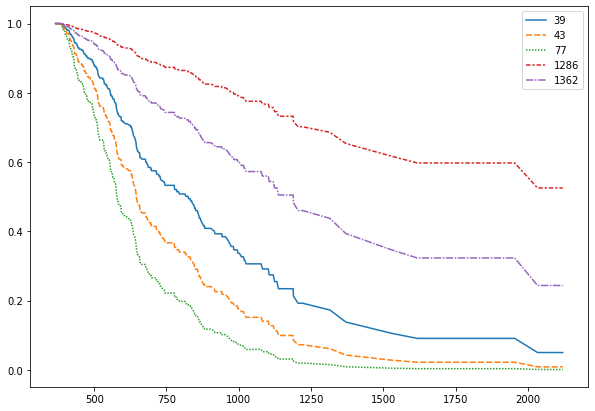

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
result = cph.predict_survival_function(test_1)
sns.lineplot(data = result)

In [ ]:
df_test.iloc[-5:, -2:]

,time_event,status
77,425,1
1362,378,0
1286,461,0
39,378,0
43,585,0


모델 평가하기 with 5-fold cv

In [ ]:
from lifelines.utils import k_fold_cross_validation

In [ ]:
import inspect
inspect.getargspec(k_fold_cross_validation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  


ArgSpec(args=['fitters', 'df', 'duration_col', 'event_col', 'k', 'scoring_method', 'fitter_kwargs'], varargs=None, keywords=None, defaults=(None, 5, 'log_likelihood', {}))

In [ ]:
cph = CoxPHFitter()
C_Idx = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]

for i in random_num_list:
    arr = k_fold_cross_validation(cph, df_train, 'time_event', event_col='status', k=5, scoring_method="concordance_index")
    C_Idx = np.concatenate((C_Idx, arr))
print(C_Idx)

[0.64095315 0.60906643 0.69230769 0.7        0.67542812 0.74458701
 0.74962963 0.58192651 0.65908229 0.65808081 0.7071601  0.67672956
 0.59545876 0.69684882 0.71039714 0.7536105  0.59283125 0.68241366
 0.66269084 0.71464646 0.63201562 0.64599237 0.66494603 0.66794827
 0.76855394 0.67743222 0.735363   0.70924639 0.68668407 0.60899796
 0.58007335 0.6626506  0.68145484 0.64859594 0.71423032 0.65844636
 0.75125743 0.64585192 0.65589279 0.62180579 0.68894009 0.63509031
 0.64338028 0.65299558 0.68085908 0.66208906 0.71517413 0.74417687
 0.67438948 0.6092959 ]


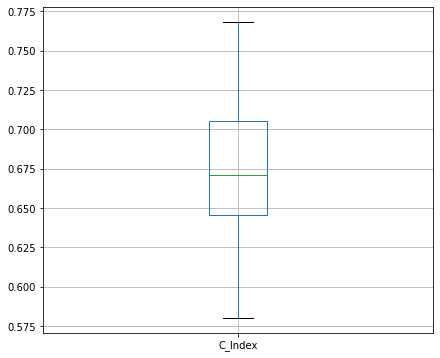

In [ ]:
df = pd.DataFrame(C_Idx)
df.columns = ['C_Index']

plt.figure(figsize=(7,6))
boxplot = df.boxplot(column=['C_Index'])
plt.show()

모델 평가하기 1 - Calibration

In [ ]:
# k-fold 교차 검증을 통해 구한 생존함수 추정치들의 사분위수 (quartile)를 구하고, 이를 이용하여 전체 자료를 4 등분한다. 
# 각 등분에서 t시점에서의 생존함수 S(t)를 Kaplan-Meier 추정량을 이용하여 추정한다. 
# 각 등분에서 k-fold 교차 검증을 이용하여 구한 S_hat(t;Z)들의 평균을 계산한다.
# 각 등분의 S_hat(t)와 평균을 쌍으로 나타낸 도표를 calibration 도표라고 부르며 적합된 모형이 완벽하다면 이 쌍들이 45도 선 위에 위치하게 된다.

ICI =  0.07424814356169471
E50 =  0.07040723534127069


/usr/local/lib/python3.7/dist-packages/lifelines/calibration.py:45: RuntimeWarning: divide by zero encountered in log
  return np.log(-np.log(1 - p))
/usr/local/lib/python3.7/dist-packages/lifelines/fitters/mixins.py:19: RuntimeWarning: invalid value encountered in subtract
  return self.relu(x - knot) ** 3 - (lambda_ * self.relu(x - min_knot) ** 3 + (1 - lambda_) * self.relu(x - max_knot) ** 3)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f063ff91f50>,
 0.07424814356169471,
 0.07040723534127069)

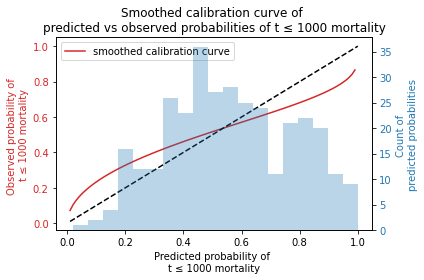

In [38]:
from lifelines.calibration import survival_probability_calibration

survival_probability_calibration(cph, df_test, t0=1000)

모델 평가하기 2 - Discrimination(AUC(t))

In [ ]:
# 자료 내 모든 개체들을 t시점까지 사건 발생 유무에 따라 사례군 (case group)과 대조군 (control group)으로 나눈다. 
# 사례군에서 k-fold 교차 검증을 이용하여 구한 t시점에서의 Sb(t;Z)를 대조군에서의 t시점에서의 생존함수 추정치와 비교한다.
# AUC(t)가 1에 가깝다면 적합된 모형이 전체 자료를 사례군와 대조군으로 완벽하게 분류할 수 있음을 의미하고,0.5에 가깝거나 그 이하일 경우는 적합된 모형의 판별적 정확성이 매우 좋지 않음을 의미한다.

비례위험 가정 검토